# Perdiction of sales

### Problem Statement
The dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [3]:
data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

Look at some basic statistics for numerical variables.

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Make some observations:

Do min, max values make sense?

Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [5]:
### categorical variables -- Item_identifier, Item_Fat_Content, Outlet_Identifier, Item_type, outlet_location_type, outlet_type
## we can use unique() or value_counts()
data['Item_Fat_Content'].unique()
data['Item_Type'].unique()
data['Item_Identifier'].unique()
data['Outlet_Identifier'].unique()
data['Outlet_Size'].unique()
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

How many products are there, how many stores, item types?

Explore the numbers of each categorical variable

In [6]:
##How many products are there
data['Item_Identifier'].value_counts()
## How many stores
data['Outlet_Identifier'].value_counts()
## How many item types
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/Users/jurajkapasny/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jurajkapasny/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


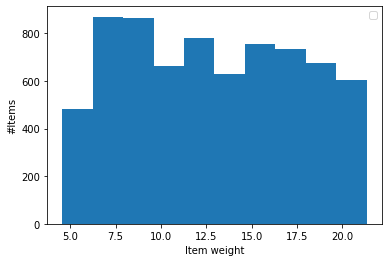

In [7]:
import matplotlib.pyplot as plt
##Item weight distribution
plt.hist(data.Item_Weight, bins=10)
plt.legend()
plt.xlabel('Item weight')
plt.ylabel('#Items')
plt.show()

Observe the output:

Tipp: look at the unique values of `Item_Fat_Content`


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Which variables have missing values? How can you fill those values? Think of some suitalbe strategy (zero filling, mean, median values. Maybe mean values per `Item_Type`?)



In [8]:
## Item_weight, Outlet_size
## Since quantitative data, replace with mean values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)
## Since qualitative data, replace with mode values
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace= True)

Check if there are no more missing values

In [9]:
data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

Item_Type variable has many categories which might prove to be very useful in analysis. Look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. Use the Item_Identifier variable to create a new column

In [10]:
# data['Item_Type_Combined'] ...
data['Item_Type_Combined'] = data['Item_Identifier'].astype(str)+'_'+data['Item_Type']

### Determine the years of operation of a store

Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [11]:
data['Years_Of_Operation'] = 2017 - data['Outlet_Establishment_Year']
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_Of_Operation
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15_Dairy,18
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01_Soft Drinks,8
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15_Meat,18
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FDX07_Fruits and Vegetables,19
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19_Household,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FDF22_Snack Foods,30
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FDS36_Baking Goods,15
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NCJ29_Health and Hygiene,13
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FDN46_Snack Foods,8


### Modify categories of Item_Fat_Content

There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [12]:
data[['Item_Fat_Content']] = data[['Item_Fat_Content']].replace(['LF', 'reg', 'low fat'], ['Low Fat','Regular', 'Low Fat'])

There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [13]:
data.loc[data.Item_Type=='Household', 'Item_Fat_Content'] = 'Not_Edible'
data.loc[data.Item_Type=='Baking Goods', 'Item_Fat_Content'] = 'Not_Edible'
data.loc[data.Item_Type=='Health and Hygiene', 'Item_Fat_Content'] = 'Not_Edible'
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'Not_Edible'], dtype=object)

### Numerical and One-Hot Coding of Categorical variables

Since scikit-learn accepts only numerical variables, convert all categories of nominal variables into numeric types. Created a new variable ‘Outlet’ same as Outlet_Identifier and code that too. O

Encode all categorical variables as numeric using `LabelEncoder` from sklearn’s preprocessing module.

In [14]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy
data_new = deepcopy(data)
data_new[['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type','Item_Type_Combined']] = data_new[['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type','Outlet_Location_Type', 'Item_Type_Combined']].apply(LabelEncoder().fit_transform)

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using `get_dummies` function of Pandas.

In [15]:
one_hot = pd.get_dummies(data_new['Item_Fat_Content'])
data1 = data_new.join(one_hot)
data1 = data1.drop('Item_Fat_Content',axis=1)

All variables are now float and each category has a new variable. 

Notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

### Exporting Data
you can save the processed data to disk

In [16]:
data1.to_csv('item.csv', index=False, encoding='utf-8')

## Model Building

Its time to start making predictive models.

Make a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, predict the sales as the overall average sales or just zero.
Making baseline models helps in setting a benchmark. If your predictive algorithm is below this, there is something going seriously wrong and you should check your data.

Split your data in 80% train set and 20% test set.
Train the model in the training set and score the model using mean squared error on the test set


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, test_size = 0.2)
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
## Define target variable and dropping unwanted features
y1  = data1['Item_Outlet_Sales']
x1 =  data1.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Item_Type_Combined', 'Outlet_Establishment_Year'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)

### Ensemble Models

Try different  ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)

Calculate the mean squared error on the test set. Explore how different parameters of the model affect the results and the performance of the model

- Use GridSearchCV to find optimal paramaters of models.

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1220.8363097029494

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
las = Lasso(alpha=0.1)
las.fit(x_train, y_train)
y_las_pred = las.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_las_pred))

1220.788287560321

### Optional: DecisionTreeRegressor, RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
rf = RandomForestRegressor()
reg = GridSearchCV(
    rf,
    {
        'n_estimators': [20,50, 100],
        'max_depth': [2,4, 6],
        'min_samples_leaf': [10,30, 50],
    },
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error' #['precision', 'recall', 'f1']
)    

In [ ]:
reg.fit(x_train, y_train)
y_random_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_random_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [27]:
reg.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)